In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import seaborn as sns
df=pd.read_csv('south_africa_training_set.csv')
pd.set_option('display.max_columns',85)

In [2]:
df.head()

,Unnamed: 0,target,hashed_user_id,regist_date,is_bind_card,lastorder_usecase,lastorder_platform,lastorder_orderdate,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month
0,0,active,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,15,1,2022-12-30,6,0,0,2,1,202212
1,1,inactive,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,11,2,2023-01-20,2,0,0,2,1,202301
2,2,inactive,-1006559301419582051,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,4,1,2022-12-06,2,0,0,1,0,202212
3,3,inactive,-1006671521575354929,2023-01-03,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,35,1,2023-01-03,17,0,0,3,2,202301
4,4,inactive,-1008193142447905044,2021-10-16,1,-1,-1,NaN,0.0,0.0,0.0,0,0,0,158,3,2022-11-21,12,0,0,7,5,202211


# Data Cleaning

In [3]:
#Change Date from Object to DateTime
df['max_date_time']=pd.to_datetime(df['max_date_time'])
df['regist_date']=pd.to_datetime(df['regist_date'])


In [4]:
df['regist_date']

0         2022-12-30
1         2022-12-30
2         2022-08-15
3         2023-01-03
4         2021-10-16
             ...    
2153652   2022-08-15
2153653   2022-08-15
2153654   2022-08-15
2153655   2022-08-15
2153656   2022-12-18
Name: regist_date, Length: 2153657, dtype: datetime64[ns]

In [5]:
#Check the number of columns with no values
nan_count = df.isna().sum()
print(nan_count )

Unnamed: 0                                 0
target                                     0
hashed_user_id                             0
regist_date                                0
is_bind_card                               0
lastorder_usecase                          8
lastorder_platform                         0
lastorder_orderdate                  1562760
subtotal_amount_today_daily                0
subtotal_amount_recent_7days               0
subtotal_amount_recent_30days              0
subtotal_ordercount_today_daily            0
subtotal_ordercount_recent_7days           0
subtotal_ordercount_recent_30days          0
nr_interactions                            0
nr_days_interacted                         0
max_date_time                              0
nr_unique_pages_visited                    0
search_events                              0
unique_search_terms                        0
unique_app_visits                          0
unique_app_category_visits                 0
year_month

In [6]:
#create column month in df to see activity visuals where needed
df['regist_month']=df['regist_date'].dt.to_period('M')

In [7]:
#Dropping Columns that won't be used
df=df.drop(['Unnamed: 0'],axis=1)
df=df.drop(['lastorder_orderdate'],axis=1)

In [8]:
df.head()

,target,hashed_user_id,regist_date,is_bind_card,lastorder_usecase,lastorder_platform,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,regist_month
0,active,-1000772633524872632,2022-12-30,0,-1,-1,0.0,0.0,0.0,0,0,0,15,1,2022-12-30,6,0,0,2,1,202212,2022-12
1,inactive,-1000772633524872632,2022-12-30,0,-1,-1,0.0,0.0,0.0,0,0,0,11,2,2023-01-20,2,0,0,2,1,202301,2022-12
2,inactive,-1006559301419582051,2022-08-15,0,-1,-1,0.0,0.0,0.0,0,0,0,4,1,2022-12-06,2,0,0,1,0,202212,2022-08
3,inactive,-1006671521575354929,2023-01-03,0,-1,-1,0.0,0.0,0.0,0,0,0,35,1,2023-01-03,17,0,0,3,2,202301,2023-01
4,inactive,-1008193142447905044,2021-10-16,1,-1,-1,0.0,0.0,0.0,0,0,0,158,3,2022-11-21,12,0,0,7,5,202211,2021-10


# Original Data Frame Visuals

## Last Order Graph

#### The graph below is a visualization of what customers have spent on the app in 30 days 

Text(0.5, 1.0, 'Last Order Usecase')

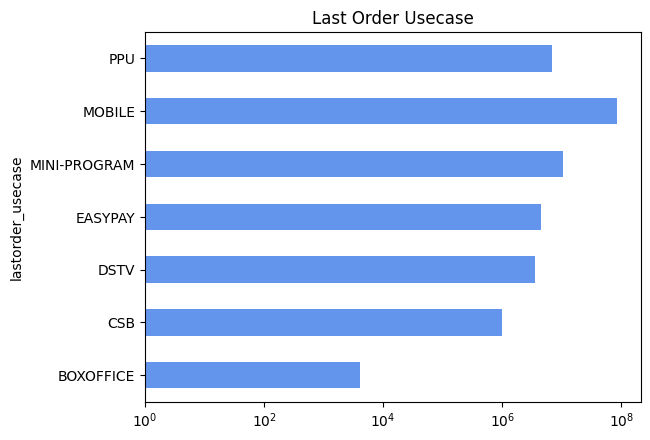

In [9]:
df.query('subtotal_amount_recent_30days>1')\
   .groupby('lastorder_usecase')['subtotal_amount_recent_30days'].sum()\
   .plot(kind='barh',log=True,color='cornflowerblue')
plt.title('Last Order Usecase')

## User Registrations Monthly

#### Below it is seen that there is a high number of registrations on the lauch of the app which was October 2021 and had the R1 promotion

#### Another spike October and November 2022 when there was campaign to win away a share of R1 million to 20 lucky winners between the 10 and 31 October 2022




Text(0.5, 1.0, 'Users Monthly Registrations')

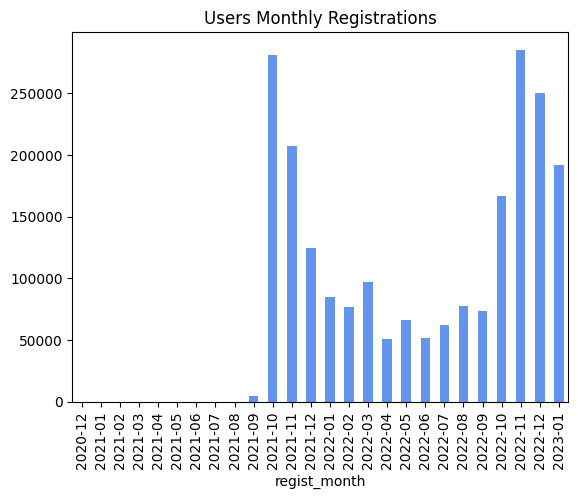

In [10]:
df.groupby('regist_month')['hashed_user_id'].count()\
.plot(kind='bar',color='cornflowerblue')
plt.title('Users Monthly Registrations')

## User Spend Behavour

#### From the below it is clear that there is a slight correlation to registrations on app and the spenditure on the app,especially on the launch month.
###

Text(0.5, 1.0, 'Amount Spent 30 Days')

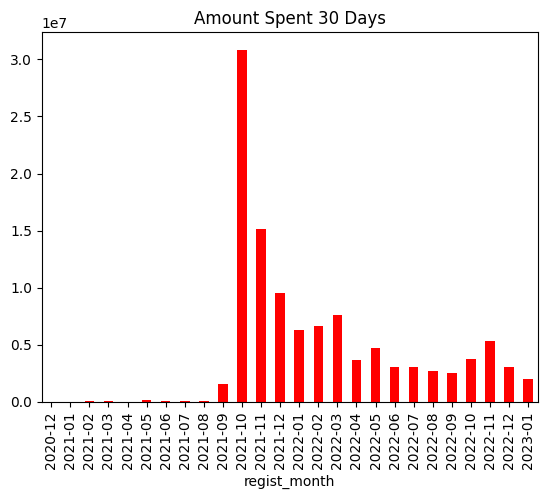

In [11]:
df.groupby('regist_month')['subtotal_amount_recent_30days'].sum()\
.plot(kind='bar' ,color='red')
plt.title('Amount Spent 30 Days')


## Using Card

#### The number of users that spending and interacting more on the app are the ones who have binded thier card on the app

In [12]:
df.groupby(['is_bind_card'])[['subtotal_amount_recent_30days','nr_days_interacted']].mean()

,subtotal_amount_recent_30days,nr_days_interacted
is_bind_card,,
0,3.706873,3.595752
1,145.485743,8.563025


<Axes: xlabel='is_bind_card'>

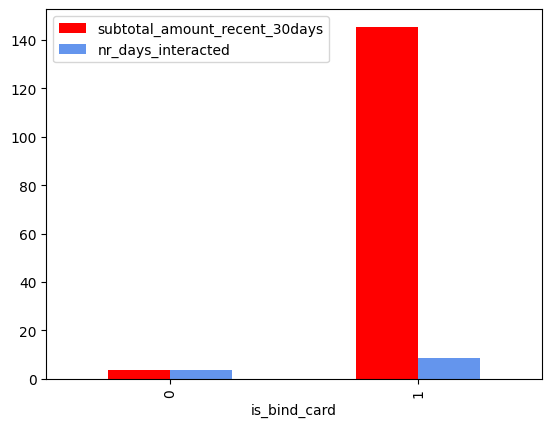

In [13]:
df.groupby(['is_bind_card'])[['subtotal_amount_recent_30days','nr_days_interacted']].mean()\
.plot(kind='bar',color=['r', 'cornflowerblue'])

# Data Preparation

#### What was noticed from our dataset is that the month of Jan 2023 there are no active users,only inactive users and we came to the conclusion to remove the data from our analysis.
 
#### Looking at the graphs below it is clear that this information can scew our predictions and data analysis




<Axes: xlabel='year_month', ylabel='nr_unique_pages_visited'>

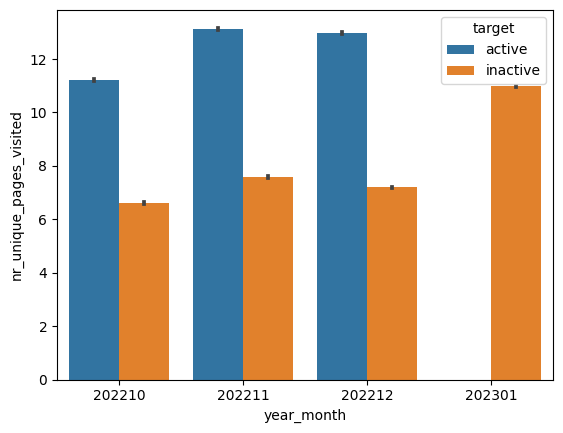

In [14]:
sns.barplot(data=df,x='year_month',y='nr_unique_pages_visited',hue='target')

### Creating DataFrame A

In [15]:
#Dropping columns we won't need and naming the df
df_a=df.drop(columns=['unique_app_category_visits','unique_search_terms','search_events',
                      'is_bind_card','subtotal_ordercount_recent_7days','subtotal_amount_recent_7days',
                      'subtotal_amount_today_daily', 'subtotal_ordercount_today_daily','is_bind_card',
                      'lastorder_platform','lastorder_usecase'],axis=1)
df_a.head()

,target,hashed_user_id,regist_date,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,unique_app_visits,year_month,regist_month
0,active,-1000772633524872632,2022-12-30,0.0,0,15,1,2022-12-30,6,2,202212,2022-12
1,inactive,-1000772633524872632,2022-12-30,0.0,0,11,2,2023-01-20,2,2,202301,2022-12
2,inactive,-1006559301419582051,2022-08-15,0.0,0,4,1,2022-12-06,2,1,202212,2022-08
3,inactive,-1006671521575354929,2023-01-03,0.0,0,35,1,2023-01-03,17,3,202301,2023-01
4,inactive,-1008193142447905044,2021-10-16,0.0,0,158,3,2022-11-21,12,7,202211,2021-10


In [16]:
#Re-arranging columns in df
df_a = df.reindex(columns=['target','hashed_user_id','regist_date','months_active','year_month',
                           'unique_app_visits','nr_days_on_app','nr_interactions',
                           'subtotal_amount_recent_30days','subtotal_ordercount_recent_30days',
                           'nr_days_interacted','max_date_time','nr_unique_pages_visited'])



In [17]:
#Creating a column to look at the number of days on app
df_a['nr_days_on_app'] =(df['max_date_time'] - df['regist_date']).dt.days

In [18]:
#Creating a column to look at the months active
df_a['months_active']=df.groupby(['hashed_user_id'])['hashed_user_id'].transform('count')

In [19]:
df_a.head()

,target,hashed_user_id,regist_date,months_active,year_month,unique_app_visits,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_days_interacted,max_date_time,nr_unique_pages_visited
0,active,-1000772633524872632,2022-12-30,2,202212,2,0,15,0.0,0,1,2022-12-30,6
1,inactive,-1000772633524872632,2022-12-30,2,202301,2,21,11,0.0,0,2,2023-01-20,2
2,inactive,-1006559301419582051,2022-08-15,1,202212,1,113,4,0.0,0,1,2022-12-06,2
3,inactive,-1006671521575354929,2023-01-03,1,202301,3,0,35,0.0,0,1,2023-01-03,17
4,inactive,-1008193142447905044,2021-10-16,1,202211,7,401,158,0.0,0,3,2022-11-21,12


### Creating DataFrame B

In [20]:
df_b=df_a.query('year_month <202301')
df_b.sort_values('subtotal_amount_recent_30days',ascending=False)\
.round(2)\
.head()

,target,hashed_user_id,regist_date,months_active,year_month,unique_app_visits,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_days_interacted,max_date_time,nr_unique_pages_visited
1976646,active,-8999309118655251227,2021-10-12,4,202212,9,444,381,109800.23,11,14,2022-12-30,52
1976645,active,-8999309118655251227,2021-10-12,4,202211,5,414,342,96589.83,9,15,2022-11-30,33
1976644,active,-8999309118655251227,2021-10-12,4,202210,4,384,200,95339.00,6,10,2022-10-31,24
880697,active,3141285788806466311,2022-10-07,4,202211,2,52,117,52062.02,4,8,2022-11-28,18
1470067,active,-8434341560974171616,2021-09-22,4,202211,7,432,216,44085.00,4,8,2022-11-28,30


### Query  Active and Inactive 

In [21]:
df_active=df_b.query("target == 'active'")
df_active.sort_values('nr_days_on_app')\
.head(10)

,target,hashed_user_id,regist_date,months_active,year_month,unique_app_visits,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_days_interacted,max_date_time,nr_unique_pages_visited
0,active,-1000772633524872632,2022-12-30,2,202212,2,0,15,0.0,0,1,2022-12-30,6
1574125,active,-2411975757039312848,2022-11-30,2,202211,1,0,5,0.0,0,1,2022-11-30,3
1574148,active,-2461071460167818998,2022-10-20,2,202210,7,0,48,0.0,0,1,2022-10-20,3
1574160,active,-2482971335238486048,2022-12-09,2,202212,5,0,23,0.0,0,1,2022-12-09,5
354935,active,7684002927941374636,2022-10-03,2,202210,2,0,17,0.0,0,1,2022-10-03,6
354913,active,7648048902289367036,2022-11-22,2,202211,6,0,38,59.0,1,1,2022-11-22,12
354891,active,7624776335956283495,2022-11-03,3,202211,2,0,64,0.0,0,1,2022-11-03,10
354885,active,7619517747276587545,2022-11-19,2,202211,3,0,36,0.0,0,1,2022-11-19,13
1574217,active,-2568450497905460894,2022-12-31,2,202212,7,0,20,0.0,0,1,2022-12-31,3
354864,active,7599741611601255070,2022-12-01,2,202212,2,0,79,0.0,0,1,2022-12-01,14


In [22]:
df_inactive=df_b.query("target == 'inactive'")
df_inactive.head()

,target,hashed_user_id,regist_date,months_active,year_month,unique_app_visits,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_days_interacted,max_date_time,nr_unique_pages_visited
2,inactive,-1006559301419582051,2022-08-15,1,202212,1,113,4,0.0,0,1,2022-12-06,2
4,inactive,-1008193142447905044,2021-10-16,1,202211,7,401,158,0.0,0,3,2022-11-21,12
5,inactive,-1008849587519297040,2022-12-18,1,202212,2,0,11,0.0,0,1,2022-12-18,4
11,inactive,-1025425308758786705,2021-11-21,2,202212,1,376,15,0.0,0,1,2022-12-02,8
12,inactive,-1030341130419364162,2022-11-08,1,202211,2,0,18,0.0,0,1,2022-11-08,5


### User activity on months

#### What we have noticed on the users that have been flagged as inactive is that the number of interactions do not grow as the months go by

<Axes: xlabel='months_active', ylabel='nr_interactions'>

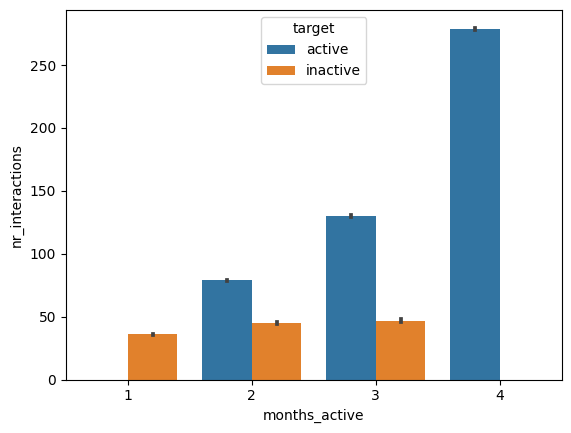

In [24]:
sns.barplot(data=df_b,x='months_active',y='nr_interactions',hue='target')

### 30 Days Order Count

In [23]:
active=df_b.query("target == 'active'")['nr_interactions']
inactive=df_b.query("target == 'inactive'")['nr_interactions']

#### Below it is clearly seen that the order count for recent 30 days on the inactive users is very low.The order count is less than 100 and most are not spending on the app as compared to the active users

Text(0.5, 1.0, 'Interactions')

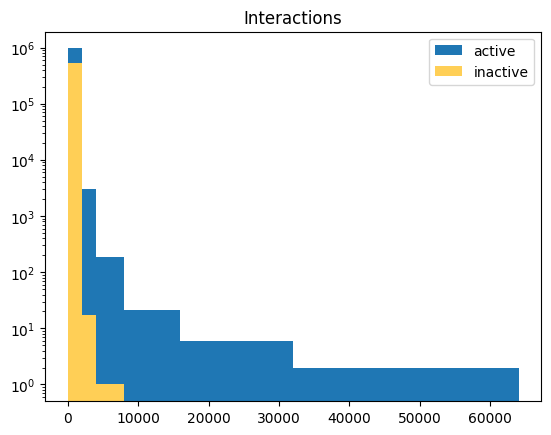

In [24]:
bins=[0,2000,4000,8000,16000,32000,64000]
plt.hist(active,bins=bins,log=True,label='active',alpha=1)
plt.hist(inactive,bins=bins,log=True,label='inactive',alpha=1,color='#FFCF56')
plt.legend(loc='best')
plt.title('Interactions')

### 30 Days Amount

In [27]:
seriesA=df_b.query("target == 'active'")['subtotal_amount_recent_30days']
seriesB=df_b.query("target == 'inactive'")['subtotal_amount_recent_30days']

Text(0.5, 1.0, '30 Days Amount')

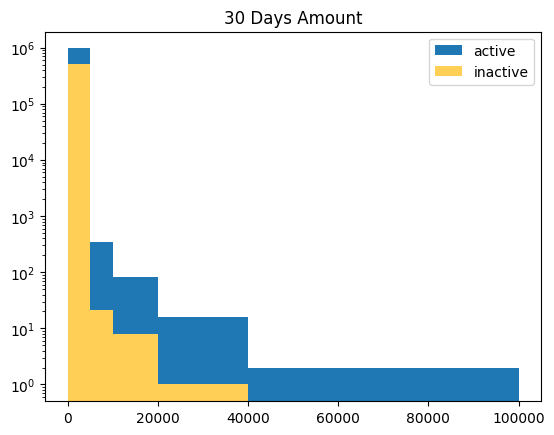

In [28]:
bins=[0,5000,10000,20000,40000,60000,100000]
plt.hist(seriesA,bins=bins,log=True,label='active',alpha=1)
plt.hist(seriesB,bins=bins,log=True,label='inactive',alpha=1,color='#FFCF56')
plt.legend(loc='best')
plt.title('30 Days Amount')

# Model Building

In [25]:
df_b.groupby(['target'])\
.agg({'unique_app_visits':['mean'],'months_active':['mean'],'nr_days_on_app':['mean'],'nr_interactions':['mean'],'subtotal_amount_recent_30days':['mean']})

,unique_app_visits,months_active,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days
,mean,mean,mean,mean,mean
target,,,,,
active,3.208628,3.186374,217.177103,183.602337,78.066437
inactive,1.964346,1.316065,116.475486,38.383840,6.175223


In [26]:
df_b.head()

,target,hashed_user_id,regist_date,months_active,year_month,unique_app_visits,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_days_interacted,max_date_time,nr_unique_pages_visited
0,active,-1000772633524872632,2022-12-30,2,202212,2,0,15,0.0,0,1,2022-12-30,6
2,inactive,-1006559301419582051,2022-08-15,1,202212,1,113,4,0.0,0,1,2022-12-06,2
4,inactive,-1008193142447905044,2021-10-16,1,202211,7,401,158,0.0,0,3,2022-11-21,12
5,inactive,-1008849587519297040,2022-12-18,1,202212,2,0,11,0.0,0,1,2022-12-18,4
6,active,-1020500780636001202,2022-04-07,4,202210,4,200,393,41.0,2,17,2022-10-24,20


In [27]:
df_b.columns

Index(['target', 'hashed_user_id', 'regist_date', 'months_active',
       'year_month', 'unique_app_visits', 'nr_days_on_app', 'nr_interactions',
       'subtotal_amount_recent_30days', 'subtotal_ordercount_recent_30days',
       'nr_days_interacted', 'max_date_time', 'nr_unique_pages_visited'],
      dtype='object')

In [28]:
df_c=df_b.drop(columns=[ 'hashed_user_id', 'subtotal_ordercount_recent_30days','regist_date',
                        'year_month','max_date_time','nr_unique_pages_visited', 'unique_app_visits', 'nr_days_on_app'],axis=1)


df_c.head()

,target,months_active,nr_interactions,subtotal_amount_recent_30days,nr_days_interacted
0,active,2,15,0.0,1
2,inactive,1,4,0.0,1
4,inactive,1,158,0.0,3
5,inactive,1,11,0.0,1
6,active,4,393,41.0,17


In [29]:
df_c['target'] = df_c['target'].map({'active': 1, 'inactive': 0})  

In [30]:
df_c.head()

,target,months_active,nr_interactions,subtotal_amount_recent_30days,nr_days_interacted
0,1,2,15,0.0,1
2,0,1,4,0.0,1
4,0,1,158,0.0,3
5,0,1,11,0.0,1
6,1,4,393,41.0,17


In [31]:
df_c.corr()['target']

target                           1.000000
months_active                    0.766647
nr_interactions                  0.261057
subtotal_amount_recent_30days    0.112878
nr_days_interacted               0.371407
Name: target, dtype: float64

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X=df_c.drop(columns=['target'])
y=df_c['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
score=accuracy_score(y_test,predictions)
score

0.9057013204364115